In [441]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression
%matplotlib inline
plt.style.use('fivethirtyeight')


In [156]:
# Get urls and name for all countries
page = requests.get('https://newsroom.churchofjesuschrist.org/facts-and-statistics')
soup = BeautifulSoup(page.text,'html.parser')
all_countries = soup.find(class_='stats-regions').find_all(class_='stats-options stats-options-list')

href = []
geo_name = []
for a in all_countries:
    for i in a.find_all('a',href=True):
        href.append(i['href'])
        geo_name.append(i.string)

In [418]:
# Get values for each country
out = []
for i in range(len(href)):
    country_page = requests.get('https://newsroom.churchofjesuschrist.org{}'.format(href[i]))
    country_text = BeautifulSoup(country_page.text,'html.parser')
    stats_box = country_text.find(id='fas-country-stats').find_all(class_='stat-block')
    names, values = [],[]
    names.append('geo')
    values.append(geo_name[i])
    for i in stats_box:
        names.append(i.find('p').string)
        values.append(i.find('h4').string)
    out.append( dict(zip(names, values)))

In [412]:
# Get urls and name for all states
page = requests.get('https://newsroom.churchofjesuschrist.org/facts-and-statistics/country/united-states')
soup = BeautifulSoup(page.text,'html.parser')
states_provinces = soup.find(id='fas-states-provinces')

state_href = []
state_geo_name = []
for a in states_provinces.find_all('a',href=True):
    state_href.append(a['href'])
    state_geo_name.append(a.string)

In [419]:
# Get values for each state append to end of list of dictionaries
for i in range(len(state_href)):
    country_page = requests.get('https://newsroom.churchofjesuschrist.org{}'.format(state_href[i]))
    country_text = BeautifulSoup(country_page.text,'html.parser')
    stats_box = country_text.find(id='fas-state-stats').find_all(class_='stat-block')
    names, values = [],[]
    names.append('geo')
    values.append(state_geo_name[i])
    for i in stats_box:
        names.append(i.find('p').string)
        values.append(i.find('h4').string)
    out.append( dict(zip(names, values)))

In [434]:
data = pd.DataFrame(out)
data.set_index('geo',inplace=True)
data.fillna('0',inplace=True)
data = raw[['Congregations','Family History Centers','Total Church Membership','Stakes','Temples']]

In [438]:
data['Congregations'] = data['Congregations'].str.replace(',', '').astype(int).values.reshape(-1,1)
data['Family History Centers'] = data['Family History Centers'].str.replace(',', '').astype(int).values.reshape(-1,1)
data['Total Church Membership'] = data['Total Church Membership'].str.replace(',', '').astype(int).values.reshape(-1,1)
data['Stakes'] = data['Stakes'].str.replace(',', '').astype(int).values.reshape(-1,1)
data['Temples'] = data['Temples'].str.replace(',', '').astype(int).values.reshape(-1,1)

C:\Users\PLambson\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\PLambson\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\PLambson\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [426]:
y = data['Temples']
x = data[['Congregations','Family History Centers','Total Church Membership','Stakes']]

In [427]:
regressor = LinearRegression()  
regressor.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [428]:
regressor.coef_

array([ 2.63727929e-03,  2.51788523e-02, -6.20803516e-06,  2.31554565e-02])

In [429]:
y_pred = regressor.predict(x)

In [430]:
predictions = pd.DataFrame([data.index,y,y_pred]).T
predictions.columns = ['geo_name','actual_temples','predicted_temples']
predictions.set_index('geo_name',inplace=True)
predictions['diff']= predictions['predicted_temples']-predictions['actual_temples']

In [444]:
predictions.sort_values(by='diff',ascending=False, inplace=True)

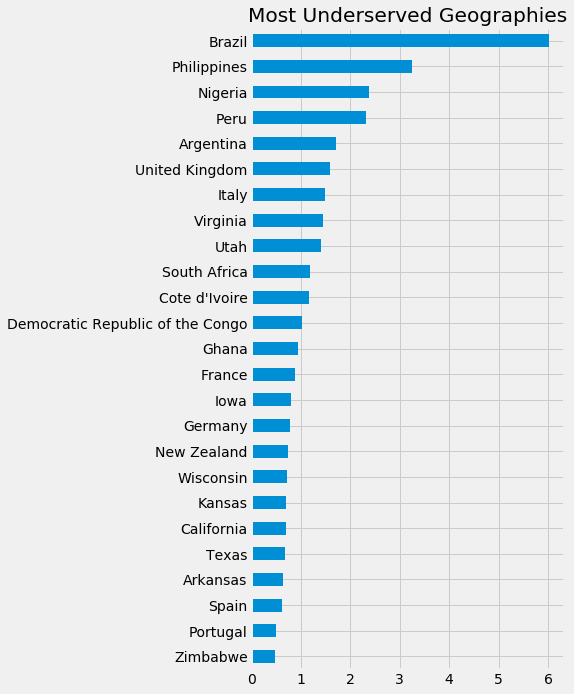

In [453]:
predictions['diff'].head(25).sort_values().plot(kind='barh',
                                  title='Most Underserved Geographies',
                                 figsize=(5,11))\
                                 .yaxis.label.set_visible(False)
#df['Patient Sex'].value_counts(normalize=True, ascending = True).plot(kind='barh')

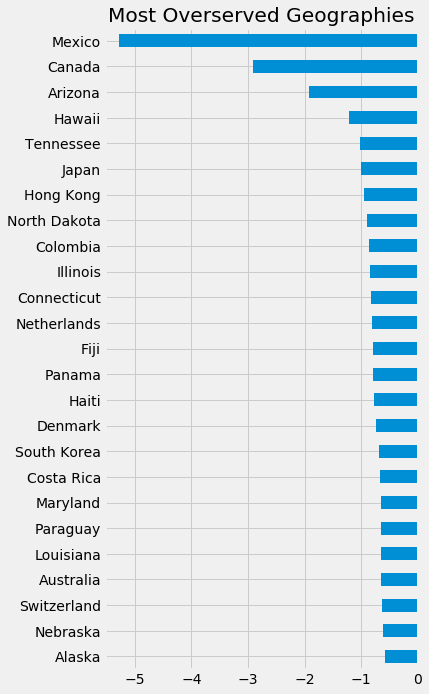

In [454]:
predictions['diff'].tail(25).plot(kind='barh',
                                  title='Most Overserved Geographies',
                                 figsize=(5,11))\
                                 .yaxis.label.set_visible(False)
#df['Patient Sex'].value_counts(normalize=True, ascending = True).plot(kind='barh')